# Analyzing the total time data given by the experiments.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [75]:
files = os.listdir(f"{os.getcwd()}/experiment_results/basic")
dataframes = {}
for file_name in files:
    column_name = f"total_time_{file_name}".strip(".csv")
    dataframes[column_name] = pd.read_csv(f"{os.getcwd()}/experiment_results/basic/{file_name}")["total-time"]

In [76]:
# Save as DataFrame and show
results = pd.DataFrame(dataframes)
print(results.head())



   total_time_Y, LCB  total_time_C, LCA  total_time_Y, LCA  total_time_C, LCB
0              10000              10000                668              10000
1              10000              10000              10000              10000
2              10000              10000              10000              10000
3              10000              10000                667              10000
4              10000              10000              10000              10000


In [77]:
# Extract the number of times that conflict occured
conflict_count = {}
for column in results.columns:
    column_name = column.strip("total_time_")
    conflict_count[column_name] = (results[column].values == 10000).sum()

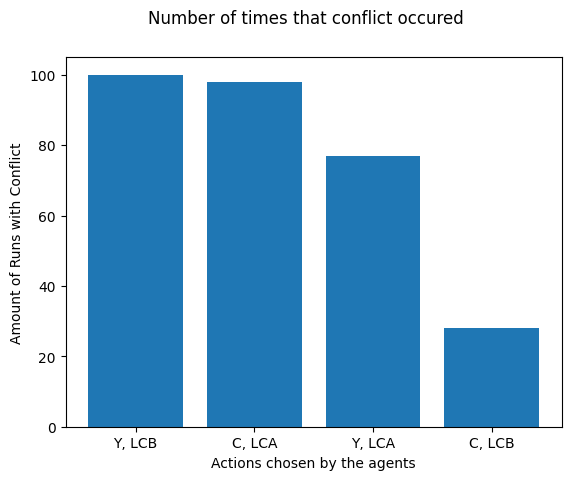

In [78]:
# Plot number of times that conflict occured
plt.bar(conflict_count.keys(), conflict_count.values())
plt.suptitle("Number of times that conflict occured")
plt.xlabel("Actions chosen by the agents")
plt.ylabel("Amount of Runs with Conflict")
plt.savefig("out/ConflictOccurence")
plt.show()

In [70]:
displacement_experiment_names = os.listdir(f"{os.getcwd()}/experiment_results/different_displacements")

In [72]:
def plot_heatmap(experiment_name: str):
    action_string = experiment_name.strip("simulation ").strip(" displacement-table.csv")
    displacement_times = pd.read_csv(f"{os.getcwd()}/experiment_results/different_displacements/{experiment_name}")
    displacement_times = displacement_times.drop(["orange-yield", "violet-merge-behind", "spectator-mode", "[step]", "[run number]"], axis=1)
    conflict_amount = displacement_times.groupby(["violet-displacement", "orange-displacement"]).apply(lambda x: (np.isclose(x,10000.0).sum()))

    grouped_conflict_amount = conflict_amount.reset_index(name='total-time')
    # Pivot the DataFrame
    pivot_conflict_amount = grouped_conflict_amount.pivot(index='violet-displacement', columns='orange-displacement', values='total-time')

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_conflict_amount, annot=True, fmt=".1f", cmap='viridis')
    plt.title(f'Amount of Conflict for varying Displacement of Both Cars with Actions {action_string}')
    plt.xlabel('Displacement of Orange Car')
    plt.ylabel('Displacement of Violet Car')
    plt.savefig(f"out/heatmap-{action_string}")
    plt.show()


/tmp/ipykernel_405954/956418415.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conflict_amount = displacement_times.groupby(["violet-displacement", "orange-displacement"]).apply(lambda x: (np.isclose(x,10000.0).sum()))


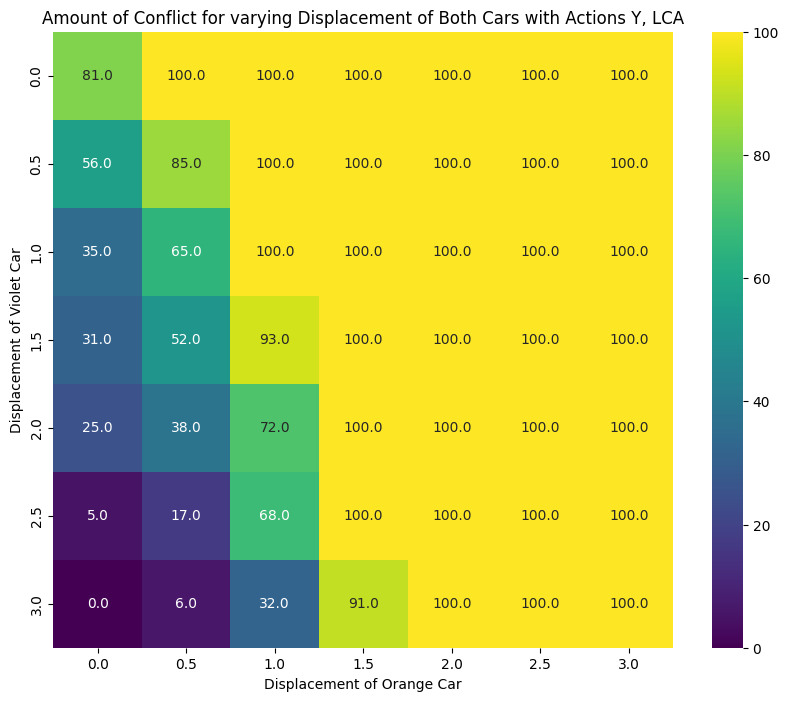

/tmp/ipykernel_405954/956418415.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conflict_amount = displacement_times.groupby(["violet-displacement", "orange-displacement"]).apply(lambda x: (np.isclose(x,10000.0).sum()))


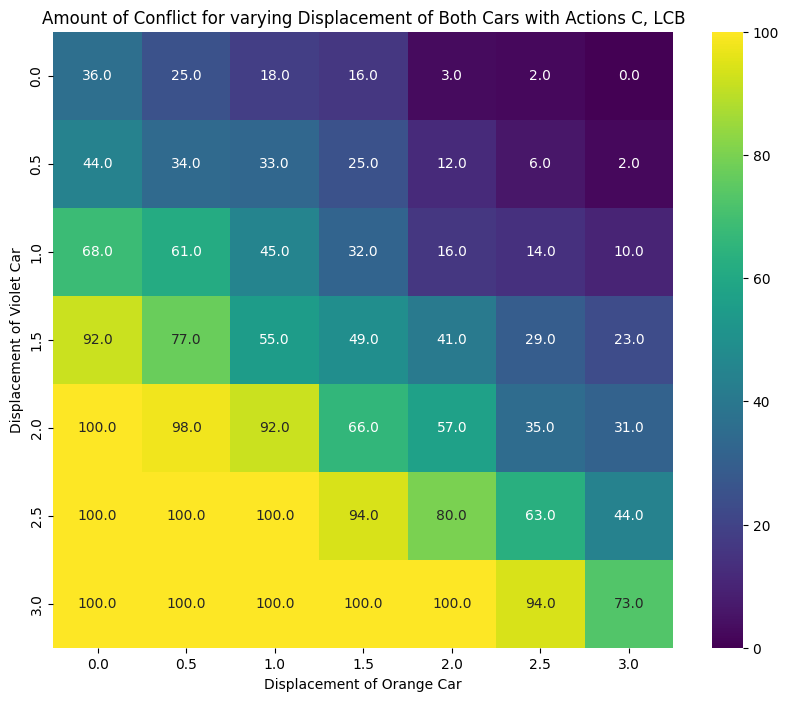

/tmp/ipykernel_405954/956418415.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conflict_amount = displacement_times.groupby(["violet-displacement", "orange-displacement"]).apply(lambda x: (np.isclose(x,10000.0).sum()))


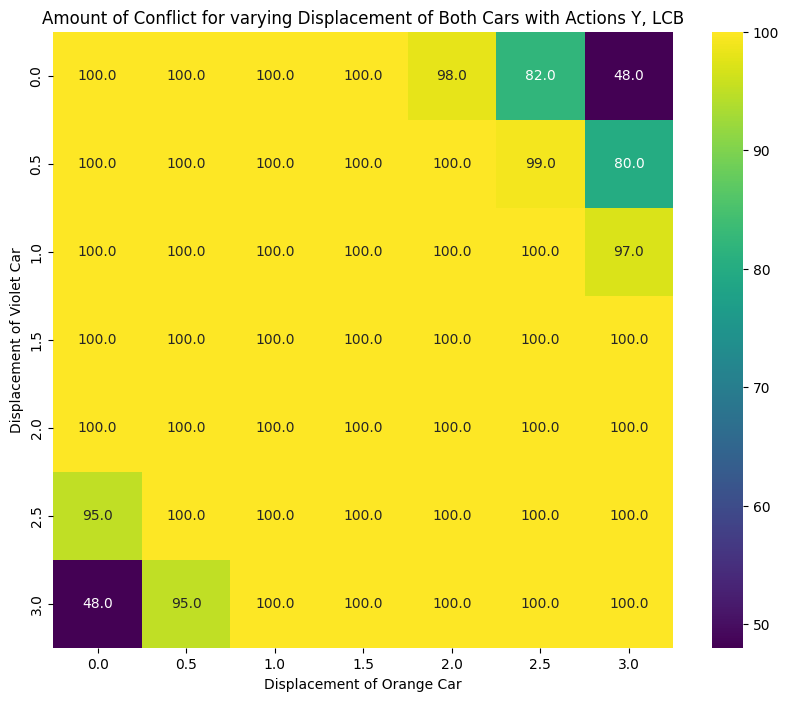

/tmp/ipykernel_405954/956418415.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conflict_amount = displacement_times.groupby(["violet-displacement", "orange-displacement"]).apply(lambda x: (np.isclose(x,10000.0).sum()))


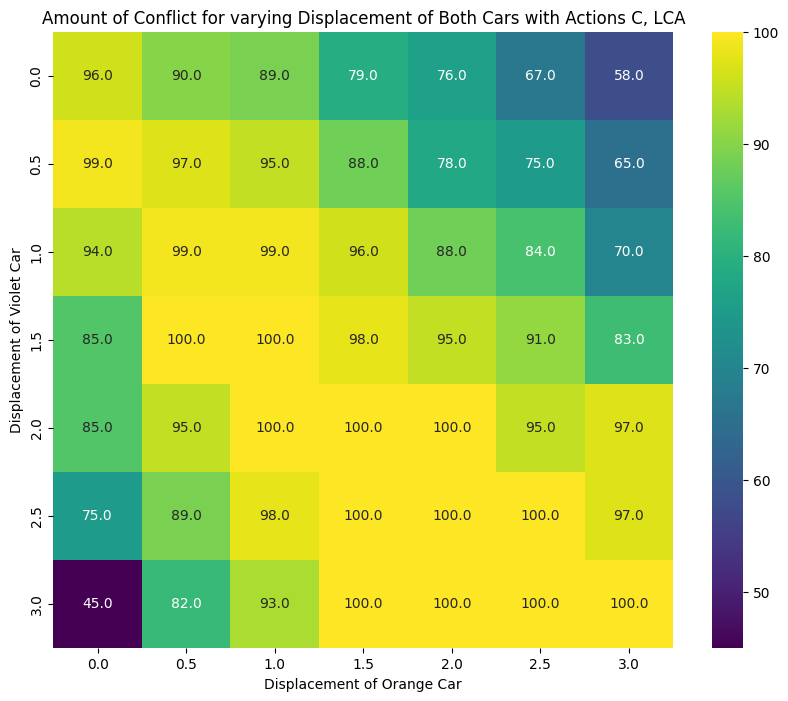

In [73]:
for experiment_name in displacement_experiment_names:
    plot_heatmap(experiment_name)